### Import modules

In [17]:
import os as os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import PIL.Image as Image

### Define file names and paths

In [18]:
# Note: path names adjusted to Windows, Mac/Linux may require path conversions

# Experiment folder path
# Default:        os.path.join(os.path.expanduser("~"), "Desktop", "Latest")
PATH_EXP_FOLDER = os.path.join(os.path.expanduser("~"), "Desktop", "Latest")

# Imaging coordinates (csv file)
# Default:        os.path.join(PATH_EXP_FOLDER, "_coordinates.csv")
PATH_CSV_COORDS = os.path.join(PATH_EXP_FOLDER, "_coordinates.csv")

# Image/mask folder path
# Default:        os.path.join(PATH_EXP_FOLDER, "Mask Images")
PATH_IMG_FOLDER = os.path.join(PATH_EXP_FOLDER, "Mask Images")

# Image/mask name endswith
# Default:          "_F001_Z001.png"
NAME_IMG_ENDSWITH = "_F001_Z001.png"

# Multichannel image resolution (um)
# Default:        366
MULTI_IMAGE_RES = 366

### Define plotting function

In [ ]:
def pyplot_create_region(
        x: float,       # center x coordinate                       float / int
        y: float,       # center y coordinate                       float / int
        w: float,       # size of FOV over x axis                   float / int
        h: float,       # size of FOV over y axis                   float / int
        c = 'b',        # color to be used to plot the center       str / chr
        e = 'b',        # color to be used to plot the border       str / chr
        f = 'left',     # alignment of the center i to x axis       str / chr
        v = 'top',      # alignment of the center i to y axis       str / chr
        i = "",         # value to be displayed at the center       (printable)
        j = "",         # image to be displayed at the center       (file path)
        a = 1,          # alpha value of all graphic elements       float / int
        g = 1,          # alpha value of all glyphic elements       float / int
        b = False,      # flip image on W-E direction if True       bool
        d = False,      # flip image on N-S direction if True       bool
        r = 0,          # counter-clockwise rotation of image       int
        t = 0,          # counter-clockwise rotation of texts       int
):
    """
    ### Store a rectangle with width = w and height = h at (x,y), marked with i.
    
    `x` : center x coordinate.
    `y` : center y coordinate.
    `w` : size of FOV over x axis.
    `h` : size of FOV over y axis.
    -----------------------------------------------------------------------------------------------
    #### Optional:
    `c` : color to be used to plot the center. Default = `'b'` *(blue)*.
    `e` : color to be used to plot the border. Default = `'b'` *(blue)*.
    `f` : alignment of the center i to x axis. Default = `'left'`.
    `v` : alignment of the center i to y axis. Default = `'top'`.
    `i` : value to be displayed at the center. Default = `""`.
    `j` : image to be displayed at the center. Default = `""`.
    `a` : alpha value of all graphic elements. Default = `1`.
    `g` : alpha value of all glyphic elements. Default = `1`.
    `b` : flip image on W-E direction if True. Default = `False`.
    `d` : flip image on N-S direction if True. Default = `False`.
    `r` : counter-clockwise rotation of image. Default = `0`.
    `t` : counter-clockwise rotation of texts. Default = `0`.
    """
    # declare two lists to store corner coordinates
    corner_x = []
    corner_y = []
    # bottom left (start)
    corner_x.append(x - 0.5*w)
    corner_y.append(y - 0.5*h)
    # top left
    corner_x.append(x - 0.5*w)
    corner_y.append(y + 0.5*h)
    # top right
    corner_x.append(x + 0.5*w)
    corner_y.append(y + 0.5*h)
    # bottom right
    corner_x.append(x + 0.5*w)
    corner_y.append(y - 0.5*h)
    # bottom left (finish)
    corner_x.append(x - 0.5*w)
    corner_y.append(y - 0.5*h)
    # plot a center dot
    plt.plot(x, y, 'o', color=c, alpha=a)
    # plot i as label
    plt.text(x, y, i, ha=f, va=v, alpha=g, rotation=t)
    # plot j as image and rectX - rectY as lines
    if j != "":
        # open image with PIL
        img = Image.open(j)
        # flip or rotate the image if needed
        if b is True:
            img = img.transpose(method=Image.Transpose.FLIP_LEFT_RIGHT)
        if d is True:
            img = img.transpose(method=Image.Transpose.FLIP_TOP_BOTTOM)
        if r != 0:
            img = img.rotate(r)
        # store img, stretch its dimension to fit the current FOV
        ax = plt.gca()
        ax.imshow(
            np.fliplr(np.flipud(img)),
            extent = (x+0.5*w, x-0.5*w, y+0.5*h, y-0.5*h),
            alpha = a
        )
        # invert the axes back as imshow will invert x and y axis
        ax.invert_xaxis()
        ax.invert_yaxis()
        # graph rectX - recty with linestyle ':'
        plt.plot(corner_x, corner_y, ':', color=e, alpha=a)
    else:
        # graph rectX - recty with linestyle '-'
        plt.plot(corner_x, corner_y, '-', color=e, alpha=a)

### Read images and coordinates, determine image type (mask/multichannel)

In [20]:
# read folder, save image paths in list
print("\nImage file paths:")
images = []
for file in os.listdir(PATH_IMG_FOLDER):
    if file[-len(NAME_IMG_ENDSWITH):] == NAME_IMG_ENDSWITH:
        images.append(os.path.join(PATH_IMG_FOLDER, file))
print(*images[:5], sep="\n")
print("...")
print(*images[-5:], sep="\n")
print(f"Total: {len(images)} images")
print("--------------------")

# read csv, save xy coordinates in list
print("\nXY coordinates:")
coords = []
csv = pd.read_csv(PATH_CSV_COORDS).values.tolist()
for row in csv:
    coords.append([row[1], row[2]])
print(*coords[:5], sep="\n")
print("...")
print(*coords[-5:], sep="\n")
print(f"Total: {len(coords)} coordinate pairs")
print("--------------------")

# determine if FOV is a mask (.png), which will affect image stretching/rotation
isMask = False
if NAME_IMG_ENDSWITH[-4:] == ".png":
    isMask = True
print("\nUsing mask images" if isMask else "\nUsing multichannel images")


Image file paths:
C:\Users\17803\Desktop\Latest\Mask Images\1000_MC_F001_Z001.png
C:\Users\17803\Desktop\Latest\Mask Images\1001_MC_F001_Z001.png
C:\Users\17803\Desktop\Latest\Mask Images\1002_MC_F001_Z001.png
C:\Users\17803\Desktop\Latest\Mask Images\1003_MC_F001_Z001.png
C:\Users\17803\Desktop\Latest\Mask Images\1004_MC_F001_Z001.png
...
C:\Users\17803\Desktop\Latest\Mask Images\1095_MC_F001_Z001.png
C:\Users\17803\Desktop\Latest\Mask Images\1096_MC_F001_Z001.png
C:\Users\17803\Desktop\Latest\Mask Images\1097_MC_F001_Z001.png
C:\Users\17803\Desktop\Latest\Mask Images\1098_MC_F001_Z001.png
C:\Users\17803\Desktop\Latest\Mask Images\1099_MC_F001_Z001.png
Total: 100 images
--------------------

XY coordinates:
[-11830.0, 1829.8]
[-11464.0, 1830.1]
[-11097.8, 1830.2]
[-10732.0, 1830.1]
[-10366.3, 1830.1]
...
[-10366.0, -1464.0]
[-10731.9, -1464.0]
[-11098.1, -1464.0]
[-11464.0, -1464.1]
[-11830.0, -1464.0]
Total: 100 coordinate pairs
--------------------

Using mask images


### Display images at corresponding coordinates

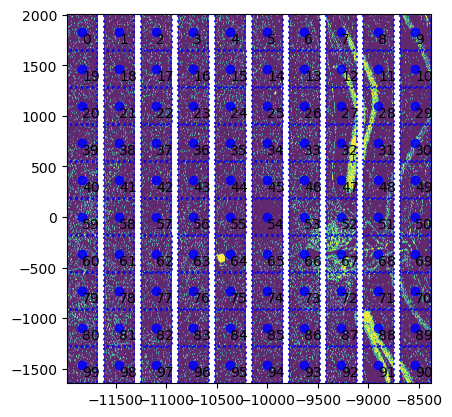

In [21]:
# create regions in matplotlib.pyplot based on the coordinates
for i, coord in enumerate(coords):
    pyplot_create_region(
        coord[0],
        coord[1],
        (MULTI_IMAGE_RES * (1906/2304)) if isMask else MULTI_IMAGE_RES,
        (MULTI_IMAGE_RES * (2270/2304)) if isMask else MULTI_IMAGE_RES,
        i = i,
        j = images[i],
        a = 0.85,
        b = False if isMask else True,
        d = False,
        r = 180 if isMask else 90
    )

# show constructed plot, set aspect to equal
plt.gca().set_aspect('equal')
plt.show()